----
# Analysis of the SA optimization
----

We optimized Tree-Tensor Networks (TNNs) using Simulated Annealing (SA).  
Here we visalize and analyze the results.

Sections:
- <a href=#load>Load the dataframe</a>
- <a href=#next>WIP</a>

----
<a id='top'></a>

In [1]:
# Set working directory to be the main directory of the repo.
import os
#try:
#    was_cwd_initialized
#except NameError:
#    os.chdir('ttn_learning/')
#    was_cwd_initialized = True
print('working directory:', os.getcwd())

import numpy as np              # Import NumPy library
import matplotlib.pyplot as plt # Import graphical library for plots
import pandas as pd
import sys
sys.path.insert(0, 'ttn_demo')
sys.path.insert(0, 'ttn_learning')
import ttn

# Name of files and directories
today = '2023-10-05'
data_path = f'ttn_learning/data/{today}_TTN_SA'

# FIXME: Currently there is no way to know the slurm_jobid
#        and slurm_procid if not manually.
slurm_jobid = '1696495532'
slurm_procid= '1696495532'
L = 16
site_dim = 2

working directory: /data/nfs_home/giangiac/pando-TN


<a id='load'></a>

----
## Load the dataframe and visualize its content

<a href=#top>Back to top</a>

In [2]:
run = 0
file_id =  f'TTN_SA_{slurm_jobid}_{slurm_procid}_{run}_L{L}_D{site_dim}'

with open(f'{data_path}/{file_id}_summary.pkl', 'rb') as f:
    df = pd.read_pickle(f)
print(df)
print(isinstance(df['state'][1], ttn.TTN))
print(isinstance(df['state'][2], ttn.TTN))

                                                 state     energy
0    TTN([\n    Tensor(shape=(2, 2), inds=('p15', '... -10.750311
1                                                 None -10.744528
2                                                 None -10.716088
3                                                 None -10.734696
4    TTN([\n    Tensor(shape=(2, 2), inds=('p2', '_... -10.740477
..                                                 ...        ...
96                                                None -10.666669
97   TTN([\n    Tensor(shape=(2, 2), inds=('p12', '... -10.700675
98   TTN([\n    Tensor(shape=(2, 2), inds=('p12', '... -10.705150
99   TTN([\n    Tensor(shape=(2, 2), inds=('p12', '... -10.690402
100  TTN([\n    Tensor(shape=(2, 2), inds=('p12', '... -10.672491

[101 rows x 2 columns]
False
False


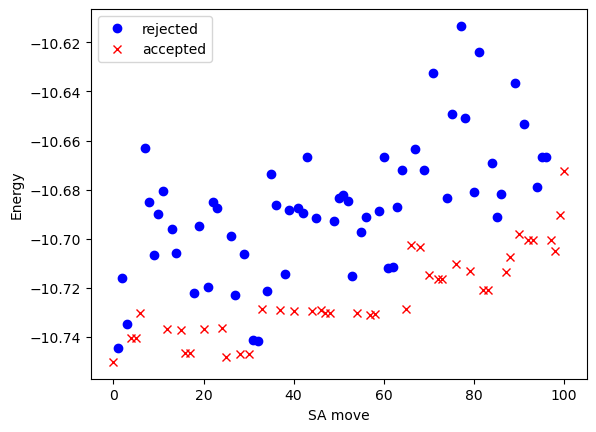

In [3]:
fig, ax = plt.subplots()

# Plot the data with 'o' marker for states where 'state' is None
ax.plot(df.index[~df['state'].notna()], df['energy'][~df['state'].notna()],
        marker='o', linestyle='', color='b', label='rejected')
# Plot the data with 'x' marker for accepted states
ax.plot(df.index[df['state'].notna()], df['energy'][df['state'].notna()],
        marker='x', linestyle='', color='r', label='accepted')

ax.set_xlabel('SA move')
ax.set_ylabel('Energy')
ax.legend()

plt.show()

----
## END
----